## FASE 2: LIMPIEZA Y TRANSFORMACIÓN 
- Eliminar info redundante, duplicados, eliminar columnas con demasiados nulos.
- Homegeneizar columnas: cambiar nombre (todas a minúscula, con guion bajo, etc.).
- Poner el tipo de dato correcto a cada columna.
- Limpieza o reemplazo de caracteres.
- Gestión de nulos.
- Creación de columnas nuevas, normalmente basadas en otras.


In [15]:
# =========================
# IMPORTACIÓN DE LIBRERÍAS
# =========================
import numpy as np
import pandas as pd


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [16]:
# =========================
# CARGA DE DATOS
# =========================

df_hr = pd.read_csv('hr.csv')  

In [17]:
# =========================
# LIMPIEZA Y TRANSFORMACIÓN
# =========================

NORMALIZACIÓN DATOS

In [18]:

df_hr['OverTime'] = df_hr['OverTime'].replace({'Yes': 1, 'No': 0}).astype("Int64") # Conversión de variables binarias a formato numérico.
df_hr['Attrition'] = df_hr['Attrition'].replace({'Yes': 1, 'No': 0}).astype(int) # Conversión de variables binarias a formato numérico.


C:\Users\Clara\AppData\Local\Temp\ipykernel_23380\4250667136.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hr['OverTime'] = df_hr['OverTime'].replace({'Yes': 1, 'No': 0}).astype("Int64") # Conversión de variables binarias a formato numérico.
C:\Users\Clara\AppData\Local\Temp\ipykernel_23380\4250667136.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hr['Attrition'] = df_hr['Attrition'].replace({'Yes': 1, 'No': 0}).astype(int) # Conversión de variables binarias a formato numérico.


ELIMINACIÓN DUPLICADOS Y COLUMNAS

In [19]:
# Eliminación de filas duplicadas.
df_hr.drop_duplicates(inplace=True)

In [20]:
# Mostrar el DataFrame.
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,sALES eXECUTIVE,4.0,Single,5993.0,19479,8,Y,1,11,3,1,80.0,0,8,0.0,1,6,4,0,5.0
1,49.0,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,rESEARCH sCIENTIST,2.0,Married,5130.0,24907,1,Y,0,23,4,4,NaN,1,10,3.0,3,10,7,1,7.0
2,37.0,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,lABORATORY tECHNICIAN,3.0,Single,2090.0,2396,6,Y,1,15,3,2,NaN,0,7,3.0,3,0,0,0,0.0
3,33.0,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,rESEARCH sCIENTIST,3.0,Married,2909.0,23159,1,Y,1,11,3,3,80.0,0,8,3.0,3,8,7,3,0.0
4,27.0,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,lABORATORY tECHNICIAN,2.0,Married,3468.0,16632,9,Y,0,12,3,4,80.0,1,6,3.0,3,2,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,lABORATORY tECHNICIAN,4.0,Married,2571.0,12290,4,Y,0,17,3,3,80.0,1,17,3.0,3,5,2,0,3.0
1466,39.0,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,hEALTHCARE rEPRESENTATIVE,1.0,Married,9991.0,21457,4,Y,0,15,3,1,80.0,1,9,5.0,3,7,7,1,7.0
1467,27.0,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,mANUFACTURING dIRECTOR,2.0,Married,6142.0,5174,1,Y,1,20,4,2,80.0,1,6,0.0,3,6,2,0,3.0
1468,49.0,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,sALES eXECUTIVE,2.0,Married,5390.0,13243,2,Y,0,14,3,4,80.0,0,17,3.0,2,9,6,0,8.0


In [21]:
#Eliminación de columnas que no aportan.
df_hr.drop(['Over18', 'EmployeeCount','StandardHours'], axis=1, inplace=True)

In [22]:
# Mostrar el DataFrame.
df_hr.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1135,46.0,0,Travel_Rarely,563,Sales,1,4,Life Sciences,1602,4,Male,56,4,4,mANAGER,1.0,Single,17567.0,3156,1,0,15,3,2,0,27,5.0,1,26,0,0,12.0
902,27.0,0,NaN,1167,Research & Development,4,2,Life Sciences,1259,1,Male,76,3,1,rESEARCH sCIENTIST,3.0,NaN,2517.0,3208,1,0,11,3,2,3,5,NaN,3,5,3,0,3.0
1391,38.0,0,Travel_Rarely,1404,Sales,1,3,Life Sciences,1961,1,Male,59,2,1,sALES rEPRESENTATIVE,1.0,Single,2858.0,11473,4,0,14,3,1,0,20,NaN,2,1,0,0,0.0
693,36.0,1,Travel_Rarely,530,Sales,3,1,Life Sciences,967,3,Male,51,2,3,sALES eXECUTIVE,4.0,Married,10325.0,5518,1,1,11,3,1,1,16,6.0,3,16,7,3,7.0
891,44.0,0,Travel_Rarely,1117,Research & Development,2,1,Life Sciences,1246,1,Female,72,4,1,rESEARCH sCIENTIST,4.0,Married,2011.0,19982,1,0,13,3,4,1,10,5.0,3,10,5,7,NaN
824,42.0,0,Travel_Rarely,188,Research & Development,29,3,Medical,1148,2,Male,56,1,2,lABORATORY tECHNICIAN,4.0,Single,4272.0,9558,4,0,19,3,1,0,16,3.0,3,1,0,0,0.0
1358,31.0,0,Travel_Rarely,1079,Sales,10,2,Medical,1912,3,Female,86,3,2,sALES eXECUTIVE,4.0,Divorced,6583.0,20115,2,1,11,3,4,1,8,2.0,3,5,2,1,4.0
1140,44.0,0,Travel_Rarely,1313,Research & Development,7,3,NaN,1608,2,Female,31,3,5,rESEARCH dIRECTOR,4.0,Divorced,19049.0,3549,0,1,14,3,4,1,23,4.0,2,22,7,1,10.0
1236,36.0,1,Travel_Rarely,1456,Sales,13,5,Marketing,1733,2,Male,96,2,2,sALES eXECUTIVE,1.0,Divorced,6134.0,8658,5,1,13,3,2,3,16,3.0,3,2,2,2,2.0
697,29.0,0,Travel_Frequently,1404,Sales,20,3,Technical Degree,974,3,Female,84,3,1,sALES rEPRESENTATIVE,4.0,Married,2157.0,18203,1,0,15,3,2,1,3,5.0,3,3,1,0,2.0


HOMOGENEIZAR DATOS

In [23]:
# Normalización de texto en JobRole.
df_hr['JobRole'] = df_hr['JobRole'].str.title().str.strip()

In [24]:
# Corrección de error tipográfico.
df_hr['MaritalStatus'] = df_hr['MaritalStatus'].str.replace("Marreid", "Married")

In [25]:
# Recodificación de BusinessTravel.
diccionario={"Travel_Frequently":"Frequently", "Travel_Rarely": "Rarely", "Non-Travel" : "Non-Travel" }

df_hr['BusinessTravel'] = df_hr['BusinessTravel'].map(diccionario)

In [26]:
# =========================
# VALIDACIONES RÁPIDAS
# =========================

In [27]:
# Contar valores de la columna.
df_hr["OverTime"].value_counts()

OverTime
0    1021
1     405
Name: count, dtype: Int64

In [28]:
# Contar valores de la columna.
df_hr["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [29]:
#Obtener datos de la columna, redondearlo y ponerlo en formato tabla.
df_hr["MonthlyIncome"].describe().round(2).reset_index()

,index,MonthlyIncome
0,count,1456.00
1,mean,6498.68
2,std,4709.39
3,min,1009.00
4,25%,2909.00
5,50%,4907.00
6,75%,8353.50
7,max,19999.00


In [30]:
#Calcular la mediana.
df_hr["MonthlyIncome"].median()

4907.0

GESTIÓN DE NULOS

In [31]:
# Se ve más claro si lo veo en porcentaje:

nulos = (df_hr.isna().sum()/df_hr.shape[0]*100).sort_values(ascending=False)
print(nulos)

YearsWithCurrManager        10.000000
MaritalStatus                8.979592
BusinessTravel               7.959184
TrainingTimesLastYear        5.986395
Age                          4.965986
EducationField               3.945578
OverTime                     2.993197
Department                   1.972789
JobSatisfaction              1.972789
MonthlyIncome                0.952381
Gender                       0.000000
EmployeeNumber               0.000000
Education                    0.000000
DailyRate                    0.000000
DistanceFromHome             0.000000
Attrition                    0.000000
JobRole                      0.000000
JobLevel                     0.000000
JobInvolvement               0.000000
HourlyRate                   0.000000
EnvironmentSatisfaction      0.000000
PercentSalaryHike            0.000000
NumCompaniesWorked           0.000000
MonthlyRate                  0.000000
RelationshipSatisfaction     0.000000
PerformanceRating            0.000000
TotalWorking

In [32]:
# Veamos las columnas de tipo object que tienen nulos.
columnas_object_con_nulos = df_hr[df_hr.columns[df_hr.isnull().any()]].select_dtypes(include = "O").columns
print(columnas_object_con_nulos)

Index(['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus'], dtype='object')


In [33]:
# Veamos, por columna, el porcentaje en el que aparece cada valor.
for col in columnas_object_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df_hr[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje.
    print("........................")


La distribución de las categorías (incluyendo nulos) para la columna BusinessTravel


BusinessTravel
Rarely        64.693878
Frequently    17.891156
Non-Travel     9.455782
NaN            7.959184
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Department


Department
Research & Development    63.877551
Sales                     29.863946
Human Resources            4.285714
NaN                        1.972789
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna EducationField


EducationField
Life Sciences       39.523810
Medical             30.408163
Marketing           10.340136
Technical Degree     8.843537
Other                5.374150
NaN                  3.945578
Human Resources      1.564626
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna MaritalStatus


MaritalStatus
Married     41.224490
Single      29.659864
Divorced    20.136054
NaN          8.979592
Name: proportion, dtype: float64

........................


In [34]:
# Vista la distribución de nulos en las variables categóricas, comenzamos con su gestión.
# Las columnas 'BusinessTravel' y 'Department' se imputarán con la moda ya que hay una categoría claramente dominante en cada una de ellas.
# Las columnas 'EducationField' y 'MaritalStatus' se imputarán con la etiqueta 'Unknown' dado que no presentan categoría dominante.

columnas_moda = ["BusinessTravel", "Department"]
for col in columnas_moda:
    df_hr[col] = df_hr[col].fillna(df_hr[col].mode()[0])


In [35]:
columnas_unknown = ["EducationField", "MaritalStatus"]
for col in columnas_unknown:
    df_hr[col] = df_hr[col].fillna('Unknown')

In [36]:
# Comprobamos que se hayan imputado correctamente.
df_hr.isnull().sum().sort_values(ascending=False)

YearsWithCurrManager        147
TrainingTimesLastYear        88
Age                          73
OverTime                     44
JobSatisfaction              29
MonthlyIncome                14
BusinessTravel                0
Attrition                     0
EducationField                0
EmployeeNumber                0
Gender                        0
EnvironmentSatisfaction       0
Department                    0
DistanceFromHome              0
Education                     0
DailyRate                     0
JobRole                       0
JobLevel                      0
JobInvolvement                0
HourlyRate                    0
NumCompaniesWorked            0
PercentSalaryHike             0
MonthlyRate                   0
MaritalStatus                 0
RelationshipSatisfaction      0
PerformanceRating             0
TotalWorkingYears             0
StockOptionLevel              0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSin

In [37]:
df_hr['EducationField'].value_counts()

EducationField
Life Sciences       581
Medical             447
Marketing           152
Technical Degree    130
Other                79
Unknown              58
Human Resources      23
Name: count, dtype: int64

In [38]:
# Veamos las columnas de tipo numérico que tienen nulos.
columnas_number_con_nulos = df_hr[df_hr.columns[df_hr.isnull().any()]].select_dtypes(include = "number").columns
print(columnas_number_con_nulos)

Index(['Age', 'JobSatisfaction', 'MonthlyIncome', 'OverTime',
       'TrainingTimesLastYear', 'YearsWithCurrManager'],
      dtype='object')


In [39]:
# Veamos, por columna, el porcentaje en el que aparece cada valor.
for col in columnas_number_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df_hr[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje.
    print("........................")


La distribución de las categorías (incluyendo nulos) para la columna Age


Age
35.0    4.965986
NaN     4.965986
34.0    4.897959
36.0    4.625850
29.0    4.421769
31.0    4.285714
32.0    4.013605
30.0    3.877551
33.0    3.877551
40.0    3.809524
38.0    3.673469
37.0    3.401361
27.0    3.265306
28.0    3.061224
42.0    2.789116
39.0    2.789116
45.0    2.721088
41.0    2.653061
26.0    2.448980
44.0    2.176871
46.0    2.176871
43.0    2.040816
50.0    1.836735
47.0    1.632653
25.0    1.564626
24.0    1.564626
49.0    1.496599
55.0    1.428571
48.0    1.224490
51.0    1.224490
53.0    1.224490
52.0    1.156463
54.0    1.088435
22.0    1.088435
56.0    0.952381
58.0    0.884354
23.0    0.884354
21.0    0.748299
20.0    0.748299
59.0    0.612245
18.0    0.544218
19.0    0.544218
60.0    0.340136
57.0    0.272109
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna JobSatisfaction


JobSatisfaction
4.0    30.952381
3.0    29.115646
1.0    19.251701
2.0    18.707483
NaN     1.972789
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna MonthlyIncome


MonthlyIncome
NaN        0.952381
2342.0     0.272109
2610.0     0.204082
2451.0     0.204082
6142.0     0.204082
             ...   
13570.0    0.068027
6712.0     0.068027
5406.0     0.068027
8938.0     0.068027
10422.0    0.068027
Name: proportion, Length: 1337, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna OverTime


OverTime
0       69.455782
1        27.55102
<NA>     2.993197
Name: proportion, dtype: Float64

........................
La distribución de las categorías (incluyendo nulos) para la columna TrainingTimesLastYear


TrainingTimesLastYear
2.0    35.238095
3.0    30.952381
4.0     7.959184
5.0     7.551020
NaN     5.986395
1.0     4.421769
6.0     4.285714
0.0     3.605442
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna YearsWithCurrManager


YearsWithCurrManager
2.0     21.904762
0.0     15.918367
7.0     13.197279
NaN     10.000000
3.0      8.367347
8.0      6.734694
4.0      6.054422
1.0      4.693878
9.0      3.741497
5.0      1.972789
6.0      1.836735
11.0     1.496599
10.0     1.360544
13.0     0.816327
12.0     0.816327
17.0     0.476190
15.0     0.272109
14.0     0.272109
16.0     0.068027
Name: proportion, dtype: float64

........................


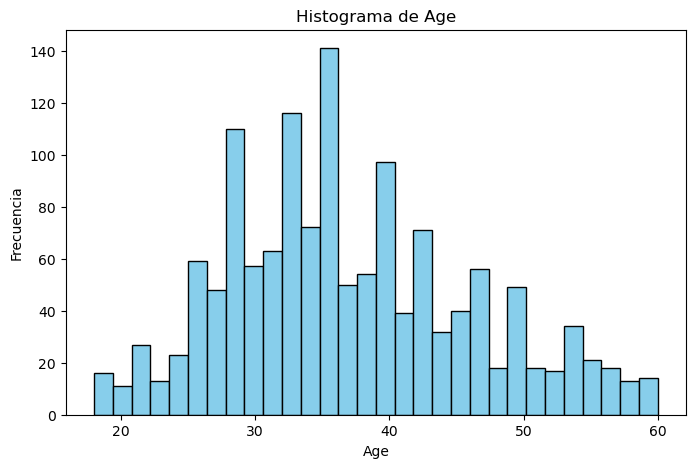

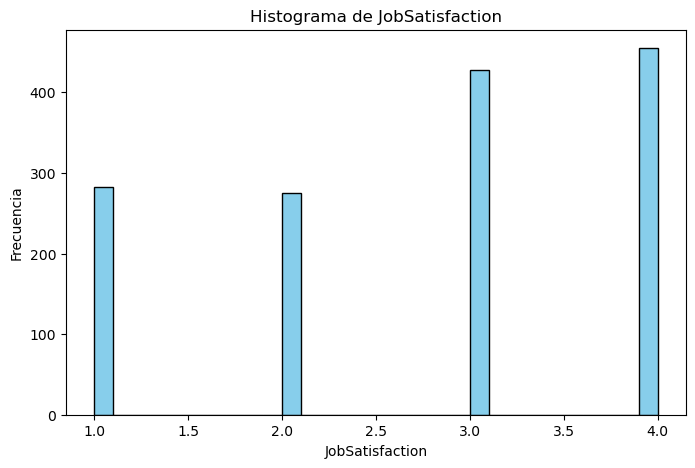

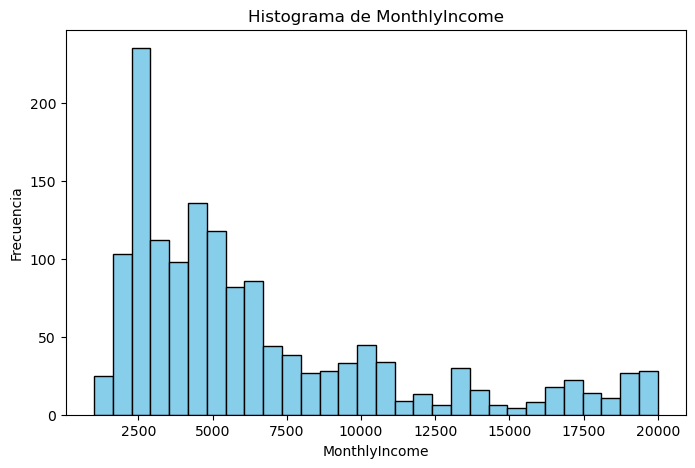

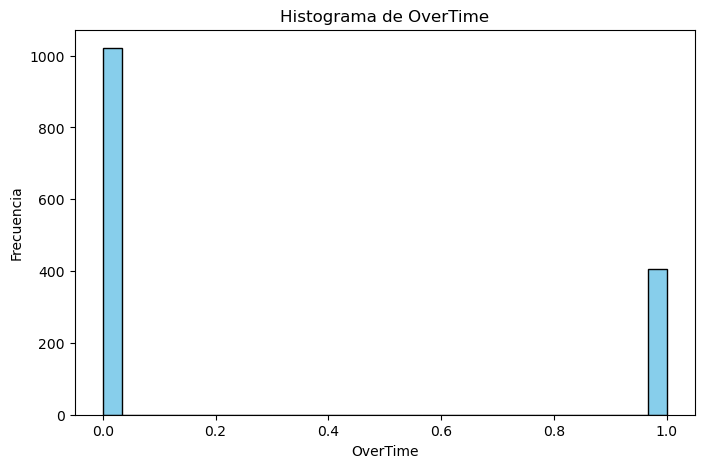

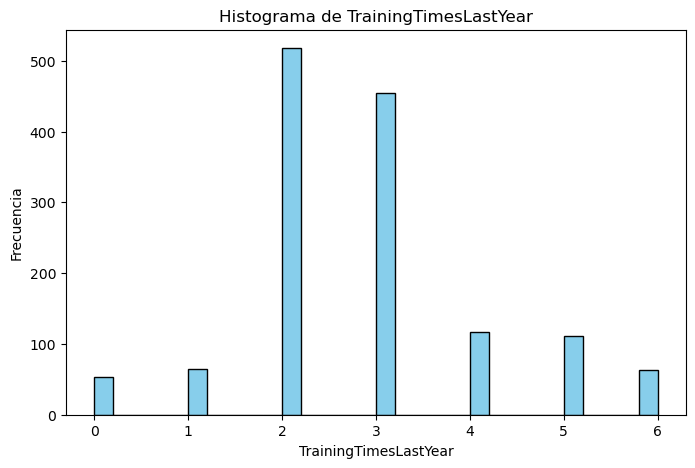

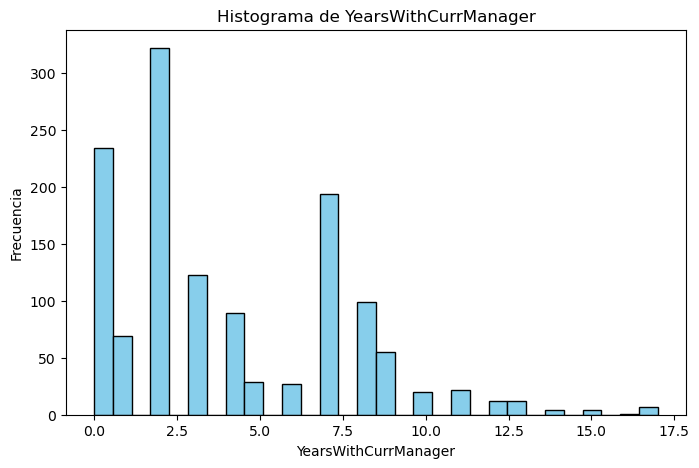

In [40]:

# Crear un histograma separado para cada columna.
for col in list(columnas_number_con_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df_hr[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


In [41]:
# Analizados los histogramas de las variables numéricas para ver la distribuación de los datos, procedemos a la gestión de los nulos.
# En las columnas 'Age', 'JobSatisfaction', 'MonthlyIncome' y 'OverTime', los valores nulos serán imputados con la mediana y .fillna();
# La distribución asimétrica y el bajo porcentaje de nulos nos lleva a la elección de este método.
# En las columnas 'TrainingTimesLastYear' y 'YearsWithCurrManager', la imputación de nulos la realizaremos con el método IterativeImputer; 
# lo justifica el alto porcentaje de nulos.

In [42]:
columnas_median = ["Age","JobSatisfaction", "MonthlyIncome", "OverTime"]
for col in columnas_median:
    df_hr[col] = df_hr[col].fillna(df_hr[col].median())


In [43]:
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_hr["TrainingTimesLastYear"] = imputer_iter.fit_transform(df_hr[["TrainingTimesLastYear"]]).round()
df_hr["YearsWithCurrManager"] = imputer_iter.fit_transform(df_hr[["YearsWithCurrManager"]]).round()

In [44]:
#Hacemos una pequeña comprobación de esta imputación.
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [45]:
# Vamos a revisar nuevamente el tipo de dato de cada columna.
df_hr.dtypes

Age                         float64
Attrition                     int64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      Int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear       float64
WorkLifeBalance             

In [46]:
# Gestionado los nulos, realizamos la conversión de tipo de datos:

df_hr = df_hr.astype({'JobSatisfaction': int , 'Age': int , 'YearsWithCurrManager': int, 'TrainingTimesLastYear': int, 'MonthlyRate': float}) 

# Se hace uso de INT y no INT64 gracias a la ausencia de nulos.

In [47]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole      

CREACIÓN DE COLUMNAS
- Una vez TRATADOS los datos(limpieza, filtrado, gestón de nulos) vamos a:
- Aplicar funciones a lo largo de un DataFrame.
- Para hacer cálculos o transformaciones en muchos datos con .apply() evitamos bubles for.
- Crear nuevas columnas aplicando las funciones. 

In [48]:
# ===========================
# CREACIÓN DE COLUMNAS NUEVAS
# ===========================

In [49]:
# =========================
# CATEGORIZACIÓN DE SALARIO
# =========================

""" Clasifica el salario en Bajo, Medio o Alto
    usando la media y la desviación estándar."""

col = "MonthlyIncome"

mean = df_hr[col].mean()
std = df_hr[col].std()

In [50]:

#Crear la función.

def categorizar_salario(numero):

    if numero < mean - std:
        return "Bajo"
    
    elif numero >  mean + std:
        return "Alto"

    else:
        return "Medio"

In [51]:
#Utilizar  el método .apply() para pasarle la función y recorrer todas las columnas.

df_hr['IncomeBand'] = df_hr['MonthlyIncome'].apply(categorizar_salario)

In [52]:
#Mostrar un ejemplo de los datos para validar que se ha creado correctamente.
df_hr.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBand
1118,26,0,Rarely,474,Research & Development,3,3,Life Sciences,1581,1,Female,89,3,1,Research Scientist,4,Unknown,2061.0,11133.0,1,0,21,4,1,0,1,5,3,1,0,0,0,Medio
1282,33,0,Rarely,867,Research & Development,8,4,Life Sciences,1798,4,Male,90,4,1,Research Scientist,1,Married,3143.0,6076.0,6,0,19,3,2,1,14,1,3,10,8,7,6,Medio
631,44,0,Rarely,986,Research & Development,8,4,Life Sciences,874,1,Male,62,4,1,Laboratory Technician,4,Married,2818.0,5044.0,2,1,24,4,3,1,10,2,2,3,2,0,2,Medio
1063,29,0,Rarely,1246,Sales,19,3,Life Sciences,1497,3,Male,77,2,2,Sales Executive,3,Unknown,8620.0,23757.0,1,0,14,3,3,2,10,3,3,10,7,0,4,Medio
1056,28,1,Frequently,1496,Sales,1,3,Technical Degree,1486,1,Male,92,3,1,Sales Representative,3,Married,2909.0,15747.0,3,0,15,3,4,1,5,3,4,3,2,1,2,Medio
949,39,0,Rarely,524,Research & Development,18,2,Life Sciences,1322,1,Male,32,3,2,Manufacturing Director,3,Single,4534.0,13352.0,0,0,11,3,1,0,9,6,3,8,7,1,7,Medio
292,31,0,Frequently,444,Sales,5,3,Marketing,399,4,Female,84,3,1,Sales Representative,2,Divorced,2789.0,3909.0,1,0,11,3,3,1,2,5,2,2,2,2,2,Medio
118,36,0,Rarely,922,Research & Development,3,2,Life Sciences,155,1,Female,39,3,1,Laboratory Technician,4,Divorced,2835.0,2561.0,5,0,22,4,1,1,7,2,3,1,0,0,0,Medio
1131,34,0,Frequently,653,Research & Development,10,4,Technical Degree,1597,4,Male,92,2,2,Healthcare Representative,3,Unknown,5063.0,15332.0,1,0,14,3,2,1,8,3,2,8,2,7,7,Medio
450,31,0,Rarely,828,Sales,2,1,Life Sciences,604,2,Male,77,3,2,Sales Executive,4,Single,6582.0,8346.0,4,1,13,3,3,0,10,2,4,6,5,0,4,Medio


In [53]:
# ===============================
# CATEGORIZACIÓN DE EDAD
# ===============================

In [54]:
#hacer la mediana de la edad
df_hr['Age'].median()

36.0

In [55]:

# Función para agrupar edades en rangos interpretables.
def categorizar_edad(numero):

#Empleados menores de 25 años
    if numero < 25:
        return "Menores 25"
# Tramo central de edad laboral
    elif 26 <= numero <= 45:
        return "Entre 26 y 45"
 # Empleados senior
    else:
        return "A partir de 45"

In [56]:
# Aplicar la función para crear la columna AgeGroup.
# Utilizar  el método .apply() para pasarle la función y recorrer todas las columnas.
df_hr['AgeGroup'] = df_hr['Age'].apply(categorizar_edad)

In [57]:
#Mostrar un ejemplo de los datos para validar que se ha creado correctamente.
df_hr.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBand,AgeGroup
288,26,1,Rarely,1449,Research & Development,16,4,Medical,394,1,Male,45,3,1,Laboratory Technician,2,Divorced,2373.0,14180.0,2,1,13,3,4,1,5,2,3,3,2,0,2,Medio,Entre 26 y 45
181,36,0,Rarely,629,Research & Development,27,2,Medical,247,4,Female,95,3,1,Research Scientist,2,Single,2311.0,5711.0,2,0,15,3,4,0,9,3,3,3,2,1,2,Medio,Entre 26 y 45
581,30,0,Rarely,921,Research & Development,1,3,Life Sciences,806,4,Male,38,1,1,Laboratory Technician,3,Married,3833.0,24375.0,3,0,21,4,3,2,7,2,3,2,2,0,2,Medio,Entre 26 y 45
589,29,1,Rarely,805,Research & Development,1,2,Life Sciences,816,2,Female,36,2,1,Laboratory Technician,1,Married,2319.0,6689.0,1,1,11,3,4,1,1,1,3,1,0,0,0,Medio,Entre 26 y 45
231,42,0,Rarely,532,Research & Development,4,2,Technical Degree,319,3,Male,58,3,5,Manager,4,Married,19232.0,4933.0,1,0,11,3,4,0,22,3,3,22,17,11,4,Alto,Entre 26 y 45
254,29,0,Rarely,1247,Sales,20,2,Marketing,349,4,Male,45,3,2,Sales Executive,4,Divorced,6931.0,10732.0,2,0,14,3,4,1,10,2,3,3,2,0,2,Medio,Entre 26 y 45
1445,41,0,Rarely,582,Research & Development,28,4,Life Sciences,2034,1,Female,60,2,4,Manufacturing Director,2,Married,13570.0,5640.0,0,0,23,4,3,1,21,3,3,20,7,0,4,Alto,Entre 26 y 45
248,37,0,Rarely,1017,Research & Development,1,2,Medical,340,3,Female,83,2,1,Research Scientist,1,Married,3920.0,18697.0,2,0,14,3,1,1,17,2,2,3,1,0,2,Medio,Entre 26 y 45
947,52,1,Rarely,1030,Sales,5,3,Life Sciences,1319,2,Male,64,3,3,Sales Executive,2,Single,8446.0,21534.0,9,1,19,3,3,0,10,2,2,8,7,7,7,Medio,A partir de 45
389,37,0,Rarely,1305,Research & Development,10,4,Life Sciences,518,3,Male,49,3,2,Manufacturing Director,2,Single,4197.0,21123.0,2,1,12,3,4,0,18,2,2,1,0,0,1,Medio,Entre 26 y 45


In [58]:
# Conteo de empleados por grupo de edad.
df_hr['AgeGroup'].value_counts().reset_index()

,AgeGroup,count
0,Entre 26 y 45,1099
1,A partir de 45,281
2,Menores 25,90


In [59]:
# ===============================
# ANÁLISIS DE ANTIGÜEDAD
# ===============================

In [60]:
# Años máximos en la empresa.
df_hr['YearsAtCompany'].max()

40

In [61]:
#Años mínimos en la empresa.
df_hr['YearsAtCompany'].min()

0

In [62]:
# Función para categorizar la antigüedad en la empresa.
def categorizar_antigüedad(numero):

    if 0 <= numero <= 2:
        return "0-2"
    
    elif 3 <= numero <= 5:
        return "3-5"
    
    elif 6 <= numero < 10:
        return "6-10"

    else:
        return "+10"

In [63]:
# Crear la columna TenureGroup.
# Utilizar  el método .apply() para pasarle la función y recorrer todas las columnas.

df_hr['TenureGroup'] = df_hr['YearsAtCompany'].apply(categorizar_antigüedad)

In [64]:
# Muestra aleatoria para validar las nuevas columnas.
df_hr.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBand,AgeGroup,TenureGroup
1451,38,0,Rarely,345,Sales,10,2,Life Sciences,2041,1,Female,100,3,2,Sales Executive,4,Married,5343.0,5982.0,1,0,11,3,3,1,10,1,3,10,7,1,4,Medio,Entre 26 y 45,+10
563,25,0,Rarely,883,Sales,26,1,Unknown,781,3,Female,32,3,2,Sales Executive,4,Single,6180.0,22807.0,1,0,23,4,2,0,6,5,2,6,5,1,4,Medio,A partir de 45,6-10
1422,36,0,Rarely,1490,Research & Development,11,4,Medical,2003,4,Male,43,3,1,Laboratory Technician,3,Married,2660.0,20232.0,7,1,11,3,3,1,5,3,3,2,2,2,2,Medio,Entre 26 y 45,0-2
790,33,0,Rarely,654,Research & Development,5,3,Life Sciences,1099,4,Male,34,2,3,Healthcare Representative,4,Divorced,7119.0,21214.0,4,0,15,3,3,1,9,2,3,3,2,1,2,Medio,Entre 26 y 45,3-5
987,51,0,Rarely,541,Sales,2,3,Marketing,1391,2,Male,52,3,3,Sales Executive,2,Married,10596.0,15395.0,2,0,11,3,2,0,14,5,3,4,2,3,4,Medio,A partir de 45,3-5


In [65]:
# ===============================
# CREACIÓN DEL INDICADOR DE RIESGO
# ===============================

In [66]:
# RiskScore: indicador numérico de riesgo de rotación.
# Se basa en factores clave de satisfacción, salario, antigüedad y carga laboral.

df_hr["RiskScore"] = (
        # Baja satisfacción laboral (peso alto).
    (df_hr["JobSatisfaction"] <= 2).astype("Int64") * 2
        # Realizar horas extra incrementa el riesgo.
    + (df_hr["OverTime"]).astype("Int64") * 2
     # Salario bajo incrementa el riesgo.
    + (df_hr["IncomeBand"] == "Bajo").astype("Int64") * 1
     # Baja antigüedad en la empresa.
    + (df_hr["YearsAtCompany"] < 2).astype("Int64") * 1
     # Mal equilibrio vida-trabajo (factor crítico).
    + (df_hr["WorkLifeBalance"] <= 2).astype("Int64") * 2
       # Baja satisfacción con el entorno laboral
    + (df_hr["EnvironmentSatisfaction"] <= 2).astype("Int64") * 1
        # Malas relaciones interpersonales.
    + (df_hr["RelationshipSatisfaction"] <= 2).astype("Int64") * 2
)

In [67]:
# Muestra aleatoria para comprobar el RiskScore.
df_hr.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBand,AgeGroup,TenureGroup,RiskScore
1010,55,0,Rarely,1136,Research & Development,1,4,Medical,1424,2,Male,81,4,4,Research Director,4,Divorced,14732.0,12414.0,2,0,13,3,4,2,31,4,4,7,7,0,0,Alto,A partir de 45,6-10,1
1126,36,0,Rarely,264,Sales,9,3,Marketing,1591,3,Male,59,3,5,Manager,3,Married,19331.0,19519.0,4,1,16,3,3,1,27,2,3,1,0,0,0,Alto,Entre 26 y 45,0-2,3
1075,32,0,Rarely,495,Research & Development,10,3,Medical,1516,3,Male,64,3,3,Manager,4,Single,11244.0,21072.0,2,0,25,4,2,0,10,5,4,5,2,0,0,Alto,Entre 26 y 45,3-5,2
853,19,0,Rarely,645,Research & Development,9,2,Life Sciences,1193,3,Male,54,3,1,Research Scientist,1,Single,2552.0,7172.0,1,0,25,4,3,0,1,4,3,1,1,0,0,Medio,Menores 25,0-2,3
209,46,0,Rarely,644,Research & Development,1,4,Medical,288,4,Male,97,3,3,Healthcare Representative,1,Divorced,9396.0,12368.0,7,0,16,3,3,1,17,3,3,4,2,0,3,Medio,A partir de 45,3-5,2
671,34,0,Rarely,546,Research & Development,10,3,Life Sciences,934,2,Male,83,3,1,Laboratory Technician,2,Unknown,2008.0,6896.0,1,0,14,3,2,2,1,3,3,1,0,1,0,Medio,Entre 26 y 45,0-2,6
230,52,0,Rarely,1323,Research & Development,2,3,Life Sciences,316,3,Female,89,2,1,Laboratory Technician,4,Single,3212.0,3300.0,7,0,15,3,2,0,6,3,2,2,2,2,2,Medio,A partir de 45,0-2,4
1336,55,0,Rarely,836,Research & Development,2,4,Technical Degree,1873,2,Male,98,2,1,Research Scientist,4,Married,2662.0,7975.0,8,0,20,4,2,1,19,2,4,5,2,0,4,Medio,A partir de 45,3-5,3
1364,28,0,Frequently,783,Sales,1,2,Life Sciences,1927,3,Male,42,2,2,Sales Executive,4,Unknown,6834.0,19255.0,1,1,12,3,3,1,7,2,3,7,7,0,7,Medio,Entre 26 y 45,6-10,2
1197,20,0,Rarely,727,Sales,9,1,Life Sciences,1680,4,Male,54,3,1,Sales Representative,1,Single,2728.0,21082.0,1,0,11,3,1,0,2,3,3,2,2,0,2,Medio,Menores 25,0-2,4


In [68]:
# Guardar el DataFrame final limpio y enriquecido.
df_hr.to_csv("df_hr_clean.csv")